# 🩺 Case Study: Predicting Medical Insurance Costs

## 🎯 Objective
In this case study, we will build machine learning models to **predict a person’s annual medical insurance charges** based on their demographic and lifestyle factors.

Insurance companies use these predictions to:
- Price health insurance plans fairly.
- Estimate future medical costs for customers.
- Identify key factors that influence healthcare expenses.

---

## 📘 Dataset Overview
We will use the **Medical Cost Personal Dataset** from Kaggle:  
🔗 [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)

### Features:
| Feature | Type | Description |
|----------|------|-------------|
| `age` | Numeric | Age of the primary beneficiary |
| `sex` | Categorical | Gender of the insured individual (male/female) |
| `bmi` | Numeric | Body Mass Index — indicates body fat level |
| `children` | Numeric | Number of dependents covered by the insurance plan |
| `smoker` | Categorical | Smoking status of the individual (yes/no) |
| `region` | Categorical | Residential region in the U.S. (northeast, northwest, southeast, southwest) |
| `charges` | Numeric | **Target variable** — Annual medical insurance cost (in USD) |

---

## 💡 Problem Statement
Given the demographic and lifestyle details of an individual, can we accurately **predict their medical insurance charges**?

We’ll answer questions like:
- How strongly do age, BMI, and smoking status affect medical costs?  
- Can a simple linear model perform well, or do we need more complex models like Random Forests?  
- How do regression metrics such as **MAE, RMSE, and R²** help us interpret model performance?

---

## 🧠 What You’ll Learn
By the end of this notebook, you’ll understand:
1. How to perform **Exploratory Data Analysis (EDA)** for regression tasks.  
2. How to preprocess mixed data (numeric + categorical).  
3. How to train and evaluate regression models such as:
   - Linear Regression  
   - Decision Tree Regressor  
   - Random Forest Regressor  
4. How to interpret regression metrics: **MAE, RMSE, R²**.  
5. How to visualize model performance (residual plots, feature importance, actual vs predicted).

---

## 🪄 ML Workflow Summary
1. Import and explore the dataset  
2. Handle missing values and outliers  
3. Perform feature encoding and scaling  
4. Train multiple regression models  
5. Evaluate using regression metrics  
6. Compare model performance visually  

---

Let’s begin by importing our required Python libraries and setting up the dataset.


In [ ]:
# ---------------------------------------------------
# Importing Required Libraries
# ---------------------------------------------------

# Core numerical and data manipulation libraries
import numpy as np                  # For numerical computations
import pandas as pd                 # For working with tabular data

# Visualization libraries
import matplotlib.pyplot as plt     # For creating static plots
import seaborn as sns               # For statistical data visualization

# Machine Learning utilities
from sklearn.model_selection import train_test_split   # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler       # For scaling numeric data
from sklearn.linear_model import LinearRegression      # Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Regression metrics

# Display settings
pd.set_option("display.float_format", lambda x: "%.2f" % x)   # To display floats with two decimals
sns.set_style("whitegrid")                                   # Set clean seaborn plot style

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


## 2. Loading the Dataset from Kaggle

We will use the **Medical Cost Personal Dataset** from Kaggle.

---

### 💾 Steps to Access the Dataset:
1. Go to your **Kaggle account settings**.  
2. Scroll to the **API** section and click **“Create New API Token”**.  
   - This will download a file named `kaggle.json` containing your Kaggle credentials.  
3. Upload this `kaggle.json` file into Colab.  
4. Use the Kaggle API to download the dataset directly into your notebook.

---

### 📦 Dataset Link:
🔗 [https://www.kaggle.com/datasets/mirichoi0218/insurance](https://www.kaggle.com/datasets/mirichoi0218/insurance)

Once downloaded and extracted, we’ll load it into a pandas DataFrame and explore it.


In [ ]:
# ---------------------------------------------------
# Upload Kaggle API key and download dataset
# ---------------------------------------------------

from google.colab import files
import os
import zipfile

# Step 1: Upload the kaggle.json file
uploaded = files.upload()

# Step 2: Move it to the correct location
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/

# Step 3: Set proper permissions
!chmod 600 /root/.kaggle/kaggle.json

# Step 4: Download the Medical Cost Personal Dataset
!kaggle datasets download -d mirichoi0218/insurance

# Step 5: Unzip the dataset
with zipfile.ZipFile("insurance.zip", "r") as zip_ref:
    zip_ref.extractall("insurance_data")

print("✅ Dataset downloaded and extracted successfully!")


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
insurance.zip: Skipping, found more recently modified local copy (use --force to force download)
✅ Dataset downloaded and extracted successfully!


In [ ]:
# ---------------------------------------------------
# Load dataset into a pandas DataFrame
# ---------------------------------------------------

df = pd.read_csv("insurance_data/insurance.csv")

# Display the first few rows
print("✅ Dataset Loaded Successfully!\n")
df.head()


✅ Dataset Loaded Successfully!



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


## 3. Exploratory Data Analysis (EDA) — First Look

Before training any model, we need to **understand our data**:
- What columns (features) are available?  
- Are there missing values?  
- What are the data types?  
- How are numerical features distributed?  
- Are there any obvious relationships or patterns?

A good EDA helps us:
- Detect data quality issues early (missing, incorrect, or skewed values).  
- Decide how to preprocess features (e.g., scaling or encoding).  
- Build an intuition for what drives medical costs.


In [ ]:
# ---------------------------------------------------
# Basic Dataset Exploration
# ---------------------------------------------------

# Display shape (rows, columns)
print("Dataset Shape:", df.shape)

# Column-wise info (data types, non-null counts)
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Display basic statistical summary for numeric columns
print("\nStatistical Summary:")
display(df.describe())

# Display sample data
print("\nSample Rows:")
display(df.head(5))


Dataset Shape: (1338, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing Values per Column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Statistical Summary:


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43



Sample Rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


### 🧩 Insights from Basic Exploration

- **No missing values** → Dataset is clean and ready for analysis.  
- **7 columns total:**
  - 4 numerical (`age`, `bmi`, `children`, `charges`)  
  - 3 categorical (`sex`, `smoker`, `region`)  
- **`charges`** is our **target variable** (what we want to predict).  
- **Scale difference**: `charges` (in thousands) vs small integers like `children` → scaling will help later.  
- **Potentially important features:**
  - `smoker` (logical correlation with higher medical expenses)
  - `age` and `bmi` (tend to increase with cost)


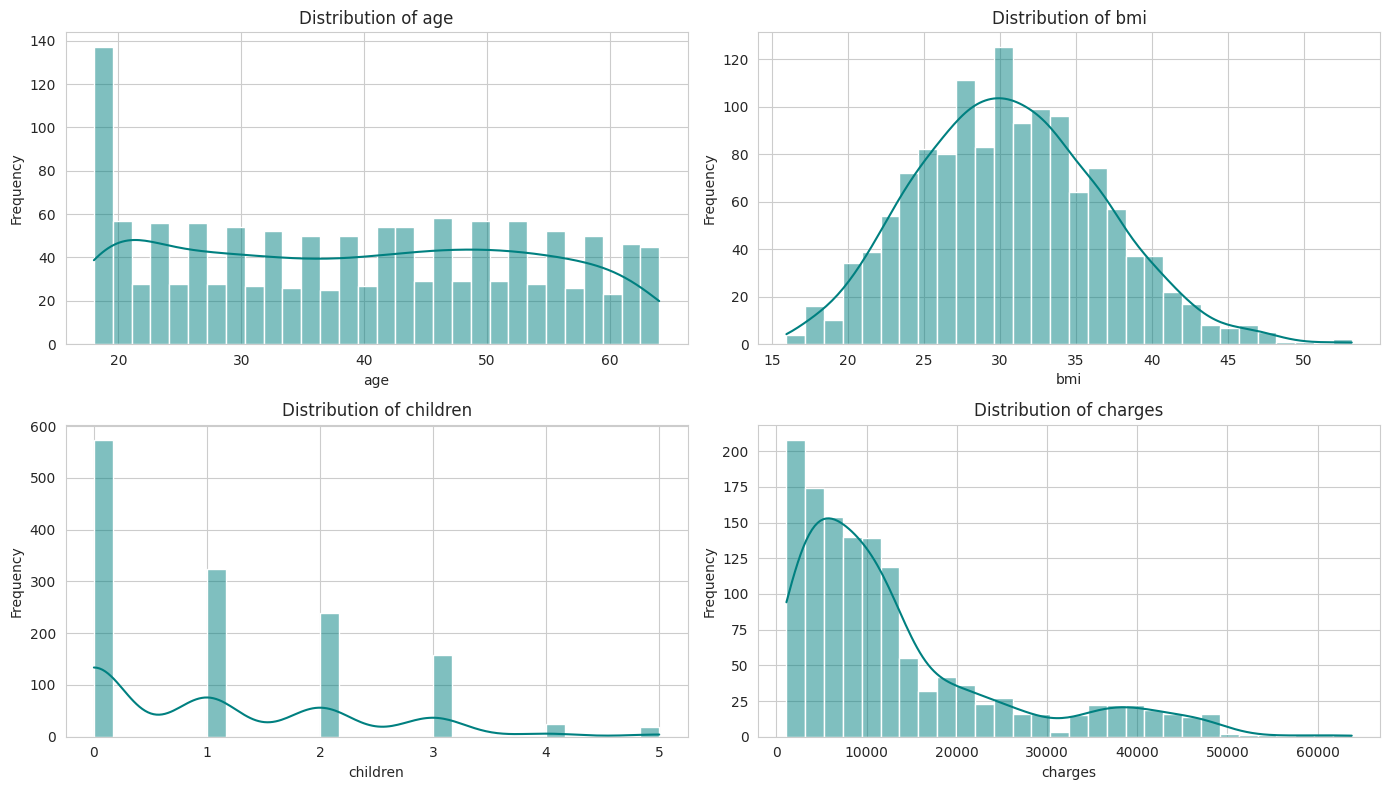

In [ ]:
# ---------------------------------------------------
# Visualizing Numerical Feature Distributions
# ---------------------------------------------------

numerical_cols = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(14, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### 📊 Insights from Distribution Plots

- **`age`** → Uniformly distributed across adults, with slight skew toward middle age.  
- **`bmi`** → Follows a normal-like distribution centered around 30 (mild right skew → overweight population).  
- **`children`** → Discrete variable; most people have 0–2 children.  
- **`charges`** → Highly **right-skewed** — most individuals have low costs, but a few have very high medical bills.  

➡️ We’ll handle this skew carefully when interpreting metrics later (mean gets affected by large outliers).


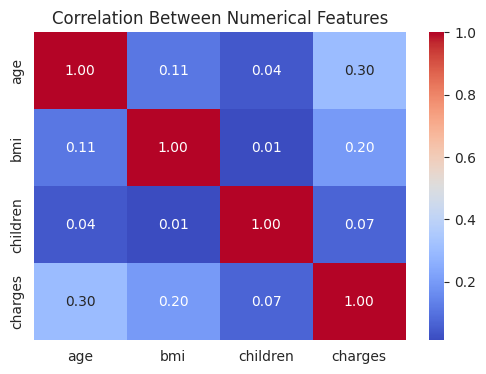

In [ ]:
# ---------------------------------------------------
# Correlation Heatmap for Numerical Features
# ---------------------------------------------------

plt.figure(figsize=(6, 4))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()


### 🔍 Insights from Correlation Heatmap

- `age` and `charges` show a strong **positive correlation** → medical cost tends to rise with age.  
- `bmi` has a moderate positive correlation → higher BMI often leads to higher medical costs.  
- `children` has weak correlation → having more children doesn’t strongly affect total charges.  
- The rest of the features are largely independent, which is good for regression (less multicollinearity).


/tmp/ipython-input-878611579.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="region", y="charges", palette="viridis")


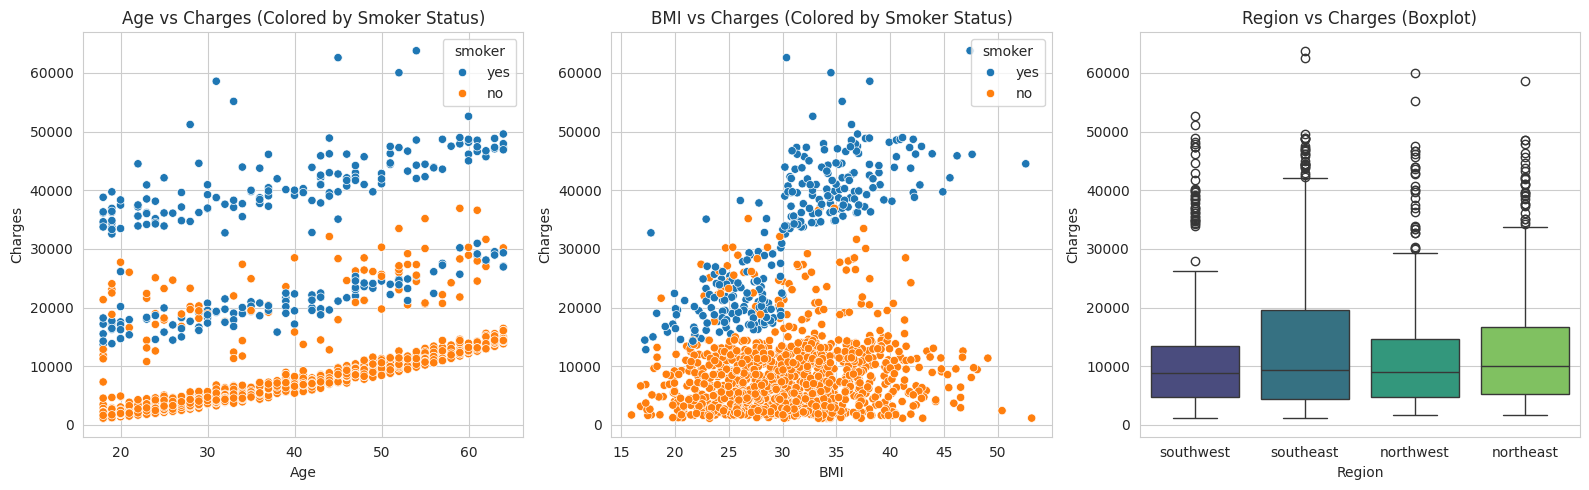

In [ ]:
# ---------------------------------------------------
# Visualizing Relationships Between Key Features and Charges
# ---------------------------------------------------

plt.figure(figsize=(16, 5))

# Age vs Charges
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="age", y="charges", hue="smoker")
plt.title("Age vs Charges (Colored by Smoker Status)")
plt.xlabel("Age")
plt.ylabel("Charges")

# BMI vs Charges
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")
plt.title("BMI vs Charges (Colored by Smoker Status)")
plt.xlabel("BMI")
plt.ylabel("Charges")

# Region vs Charges
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="region", y="charges", palette="viridis")
plt.title("Region vs Charges (Boxplot)")
plt.xlabel("Region")
plt.ylabel("Charges")

plt.tight_layout()
plt.show()


### 💡 Observations from Relationship Plots

- **Age vs Charges:**  
  - Clear upward trend — older individuals generally have higher costs.  
  - Smokers (orange dots) have significantly higher costs at all ages.  

- **BMI vs Charges:**  
  - Costs increase with BMI, especially for smokers (shows a compounding effect).  

- **Region vs Charges:**  
  - Regional differences are relatively minor — not a major cost driver here.  

➡️ Smoking status appears to be the **strongest predictor** of high medical costs.


## 4. Data Preprocessing

Before we can train our Linear Regression model, we need to **prepare the dataset** so that all features are numeric and scaled properly.

### 🧱 Steps to Preprocess:
1. **Split features and target variable**
   - `charges` → target (what we want to predict)
   - All others → features (inputs)

2. **Handle categorical variables**
   - Use **One-Hot Encoding** to convert categories (like `sex`, `smoker`, `region`) into numeric columns.
   - For example, “region” → `region_northeast`, `region_southeast`, etc.

3. **Scale numerical features**
   - Features like `age`, `bmi`, and `children` have different scales.
   - Scaling ensures that no single feature dominates the model because of its magnitude.

4. **Visualize the transformed dataset**
   - We’ll inspect what the preprocessed data looks like after encoding and scaling.


In [ ]:
# ---------------------------------------------------
# Split features (X) and target (y)
# ---------------------------------------------------

# Target variable
y = df["charges"]

# Input features
X = df.drop(columns=["charges"])

print("✅ Feature and target variables separated successfully!")
print("\nFeature Columns:", X.columns.tolist())
print("\nTarget Variable:", y.name)



✅ Feature and target variables separated successfully!

Feature Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

Target Variable: charges


In [ ]:
# ---------------------------------------------------
# Define preprocessing steps
# ---------------------------------------------------

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separate numeric and categorical columns
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

# Create column transformer
# - Scale numeric features
# - One-hot encode categorical features
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

print("✅ Preprocessing pipeline defined successfully!")


✅ Preprocessing pipeline defined successfully!


In [ ]:
# ---------------------------------------------------
# Split the data into training and testing sets
# ---------------------------------------------------
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns="charges")
y = df["charges"]

# Split data — 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Train/Test split completed successfully!")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print("Feature columns:", X_train.columns.tolist())


✅ Train/Test split completed successfully!
Training samples: 1070
Testing samples: 268
Feature columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['sex', 'smoker', 'region'])])

#  8. Gradient Descent Implementation (Multivariate)

### 💡 Understanding Gradient Descent
Gradient Descent is the process of **iteratively improving model parameters** to minimize prediction error.  
At each step, the model adjusts its weights in the direction that **reduces the overall error** the most.

Think of it like walking downhill — taking small steps until you reach the lowest point (the optimal parameters).  
The learning rate controls **how big those steps are**:
- Too large → you overshoot the minimum  
- Too small → training becomes very slow  

We'll use **`SGDRegressor` from scikit-learn**, which applies gradient descent automatically on all features.


In [ ]:
# ---------------------------------------------------
# Gradient Descent using SGDRegressor
# ---------------------------------------------------
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

gd_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("sgd_reg", SGDRegressor(
        max_iter=1000,
        tol=1e-3,
        penalty=None,
        eta0=0.01,
        random_state=42
    ))
])

gd_pipeline.fit(X_train, y_train)
y_pred_gd = gd_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_gd)
mse = mean_squared_error(y_test, y_pred_gd)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gd)

print("📊 Gradient Descent (SGDRegressor) Performance:")
print(f" - MAE  : {mae:.2f}")
print(f" - MSE  : {mse:.2f}")
print(f" - RMSE : {rmse:.2f}")
print(f" - R²    : {r2:.3f}")


📊 Gradient Descent (SGDRegressor) Performance:
 - MAE  : 4203.51
 - MSE  : 33709902.82
 - RMSE : 5806.02
 - R²    : 0.783


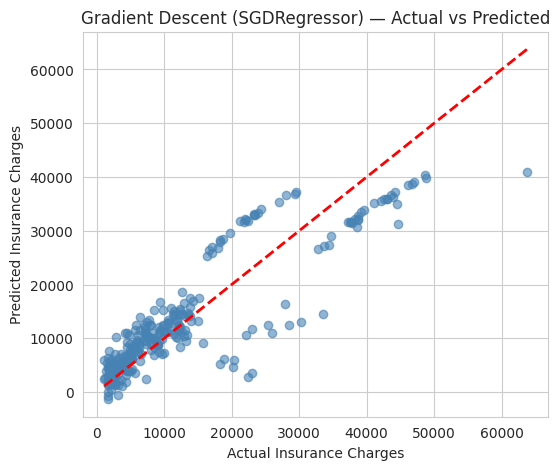

In [ ]:
# ---------------------------------------------------
# Visualization: Actual vs Predicted
# ---------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_gd, color="steelblue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Gradient Descent (SGDRegressor) — Actual vs Predicted")
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.show()


###  Insights

- The scatter plot should align closely with the diagonal line → indicating good predictions.  
- The `SGDRegressor` automatically applies **gradient descent** to update weights until convergence.  
- Scaling is critical here — features with larger ranges can dominate the gradient steps otherwise.  
- You can tune:
  - `eta0` → learning rate  
  - `max_iter` → number of passes over the data  
  - `penalty` → add regularization (Ridge or Lasso-like)

✅ This sets the foundation for understanding optimization before we explore **Polynomial Regression** next.


# 📈 9. Polynomial Regression

### 💡 Concept
Linear regression assumes a straight-line relationship between input and output.  
But what if the relationship is **curved or non-linear**?

**Polynomial Regression** allows the model to fit curves by adding extra polynomial terms of the input features.

We'll use `PolynomialFeatures` with a linear model to demonstrate this — effectively turning linear regression into a flexible non-linear model.


In [ ]:
# ---------------------------------------------------
# Polynomial Regression (with preprocessing)
# ---------------------------------------------------
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

poly_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])

poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)

print("📊 Polynomial Regression Performance:")
print(f" - MAE  : {mae:.2f}")
print(f" - MSE  : {mse:.2f}")
print(f" - RMSE : {rmse:.2f}")
print(f" - R²    : {r2:.3f}")


📊 Polynomial Regression Performance:
 - MAE  : 2729.50
 - MSE  : 20712805.99
 - RMSE : 4551.13
 - R²    : 0.867


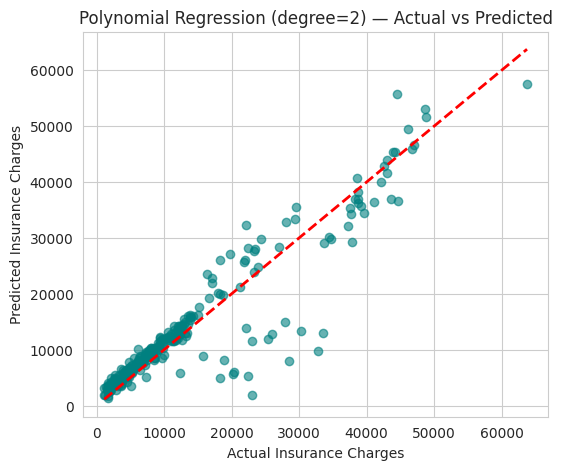

In [ ]:
# ---------------------------------------------------
# Visualization: Actual vs Predicted
# ---------------------------------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_poly, color="teal", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Polynomial Regression (degree=2) — Actual vs Predicted")
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.show()


###  Insights

- Polynomial features allow the model to **capture curvature** and more complex trends.  
- Even with a degree of 2, the model gains flexibility without manual feature engineering.  
- However, as polynomial degree increases:
  - Model complexity rises  
  - Risk of **overfitting** grows  

Next, we’ll explore how **Regularization (Ridge & Lasso)** helps balance model complexity and generalization.


#  10. Regularization — Ridge & Lasso Regression

### 💡 Why Regularization?
When a model becomes too complex (like polynomial regression), it might **memorize training data** instead of learning general patterns — this is called **overfitting**.

**Regularization** helps control this by **penalizing large coefficients**, encouraging the model to stay simpler and more balanced.

Types:
- **Ridge (L2 Regularization)** → shrinks coefficients evenly (never zero)
- **Lasso (L1 Regularization)** → can shrink some coefficients exactly to zero (feature selection)

We'll fit both Ridge and Lasso models and compare their performance.


In [ ]:
# ---------------------------------------------------
# Ridge Regression (L2 Regularization)
# ---------------------------------------------------
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

ridge_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("ridge", Ridge(alpha=1.0, random_state=42))
])

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)

print("📊 Ridge Regression Performance:")
print(f" - MAE  : {mae:.2f}")
print(f" - MSE  : {mse:.2f}")
print(f" - RMSE : {rmse:.2f}")
print(f" - R²    : {r2:.3f}")


📊 Ridge Regression Performance:
 - MAE  : 4193.20
 - MSE  : 33645393.49
 - RMSE : 5800.46
 - R²    : 0.783


In [ ]:
# ---------------------------------------------------
# Lasso Regression (L1 Regularization)
# ---------------------------------------------------
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(alpha=0.05, max_iter=5000, random_state=42))
])

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

print("📊 Lasso Regression Performance:")
print(f" - MAE  : {mae:.2f}")
print(f" - MSE  : {mse:.2f}")
print(f" - RMSE : {rmse:.2f}")
print(f" - R²    : {r2:.3f}")


📊 Lasso Regression Performance:
 - MAE  : 4181.25
 - MSE  : 33597353.43
 - RMSE : 5796.32
 - R²    : 0.784


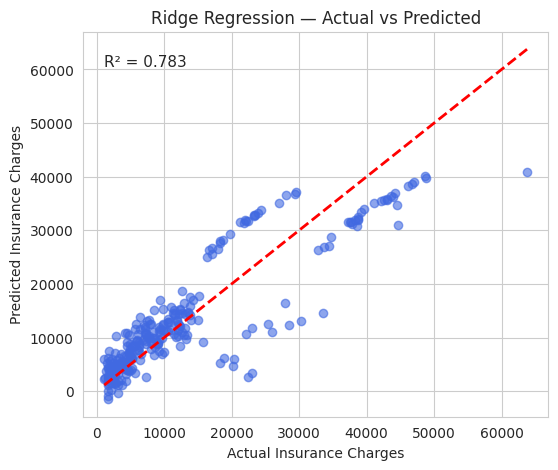

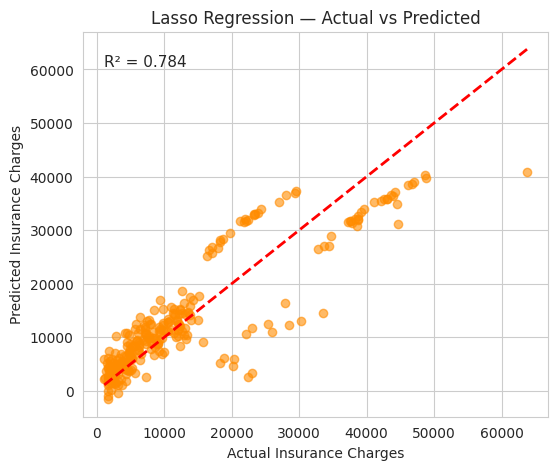

''

In [ ]:
# ---------------------------------------------------
# Ridge with R² annotation
# ---------------------------------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_ridge, color="royalblue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.text(y_test.min(), y_test.max()*0.95, f"R² = {r2_score(y_test, y_pred_ridge):.3f}", fontsize=11)
plt.title("Ridge Regression — Actual vs Predicted")
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.show()

# ---------------------------------------------------
# Lasso with R² annotation
# ---------------------------------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_lasso, color="darkorange", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.text(y_test.min(), y_test.max()*0.95, f"R² = {r2_score(y_test, y_pred_lasso):.3f}", fontsize=11)
plt.title("Lasso Regression — Actual vs Predicted")
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.show()
""

#  11. K-Nearest Neighbors (KNN) Regressor

### 💡 Concept
Unlike linear or polynomial regression that learn mathematical relationships,  
**K-Nearest Neighbors (KNN)** makes predictions based purely on **similarity**.

For a new data point:
- It finds the *k* closest samples in the training set.
- Predicts the target by averaging their values (for regression).

✅ It’s a **non-parametric** model — no coefficients or equations, just data comparisons.  
However, since it relies on distance, **scaling** features (as we already do in the preprocessor) is crucial.


In [ ]:
# ---------------------------------------------------
# K-Nearest Neighbors Regression
# ---------------------------------------------------
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("knn", KNeighborsRegressor(
        n_neighbors=7,          # Number of neighbors to consider
        weights="distance"      # Closer neighbors have more influence
    ))
])

# Train
knn_pipeline.fit(X_train, y_train)

# Predict
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)

print("📊 K-Nearest Neighbors Regression Performance:")
print(f" - MAE  : {mae:.2f}")
print(f" - MSE  : {mse:.2f}")
print(f" - RMSE : {rmse:.2f}")
print(f" - R²    : {r2:.3f}")


📊 K-Nearest Neighbors Regression Performance:
 - MAE  : 3878.17
 - MSE  : 44520679.77
 - RMSE : 6672.38
 - R²    : 0.713


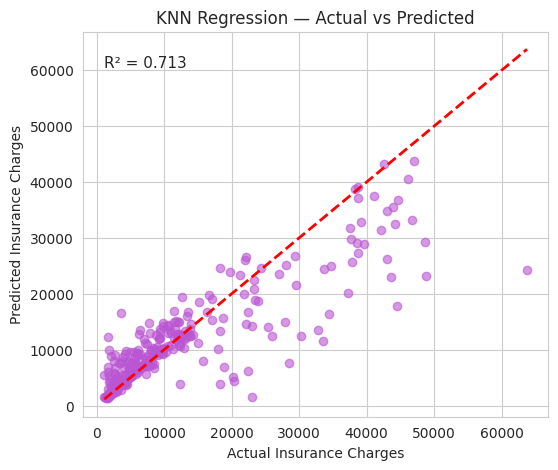

In [ ]:
# ---------------------------------------------------
# Visualization: Actual vs Predicted (KNN)
# ---------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_knn, color="mediumorchid", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.text(y_test.min(), y_test.max()*0.95, f"R² = {r2_score(y_test, y_pred_knn):.3f}", fontsize=11)
plt.title("KNN Regression — Actual vs Predicted")
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.show()


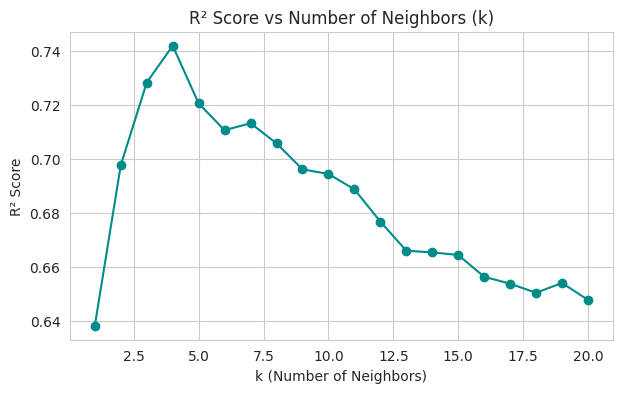

In [ ]:
# ---------------------------------------------------
# Model Tuning: Effect of Different K Values
# ---------------------------------------------------
k_values = range(1, 21)
r2_scores = []

for k in k_values:
    model = Pipeline([
        ("preprocessor", preprocessor),
        ("knn", KNeighborsRegressor(n_neighbors=k, weights="distance"))
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

plt.figure(figsize=(7,4))
plt.plot(k_values, r2_scores, marker='o', color='darkcyan')
plt.title("R² Score vs Number of Neighbors (k)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()


###  Insights

- KNN makes no assumptions about the data — it learns directly from examples.  
- Smaller *k* → model reacts strongly to noise (high variance).  
- Larger *k* → smoother predictions (higher bias).  
- `weights="distance"` improves performance by giving nearby neighbors more influence.  
- Scaling (via the preprocessor) is vital since KNN relies on **Euclidean distance**.

✅ KNN is simple yet powerful for smaller datasets — a great way to show instance-based learning.

Next, we’ll move into **Decision Tree Regression**, which splits the data using **variance reduction** to make predictions.


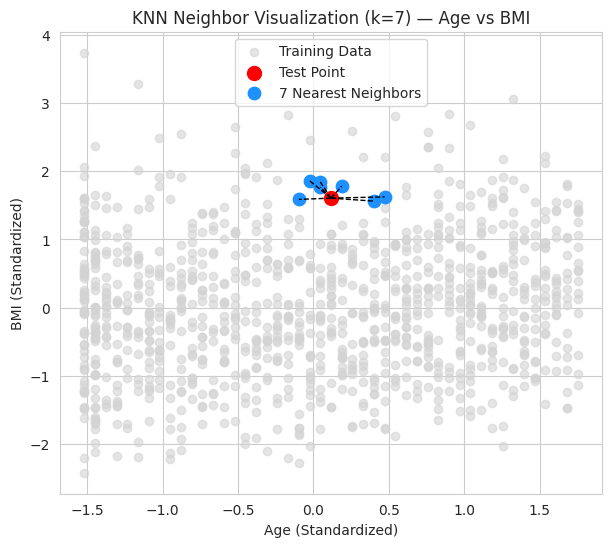

Distances to 7 nearest neighbors:
[0.176 0.19  0.214 0.247 0.288 0.292 0.356]


In [ ]:
# ---------------------------------------------------
# Visualize KNN distances for a random test sample
# ---------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Pick two numeric features for visualization
features_2d = ["age", "bmi"]

# Preprocess numeric features manually for 2D visualization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features_2d])
X_test_scaled = scaler.transform(X_test[features_2d])

# Select a random test point
np.random.seed(42)
rand_idx = np.random.randint(0, len(X_test_scaled))
test_point = X_test_scaled[rand_idx].reshape(1, -1)

# Fit NearestNeighbors for visualization
k = 7
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_train_scaled)
distances, indices = nbrs.kneighbors(test_point)

# Plot all training points
plt.figure(figsize=(7,6))
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1],
            c="lightgray", label="Training Data", alpha=0.6)

# Highlight the selected test point
plt.scatter(test_point[0,0], test_point[0,1],
            c="red", s=100, label="Test Point")

# Highlight nearest neighbors
plt.scatter(X_train_scaled[indices[0], 0], X_train_scaled[indices[0], 1],
            c="dodgerblue", s=80, label=f"{k} Nearest Neighbors")

# Draw lines showing distances
for neighbor_idx in indices[0]:
    plt.plot([test_point[0,0], X_train_scaled[neighbor_idx, 0]],
             [test_point[0,1], X_train_scaled[neighbor_idx, 1]],
             "k--", lw=1)

plt.title(f"KNN Neighbor Visualization (k={k}) — Age vs BMI")
plt.xlabel("Age (Standardized)")
plt.ylabel("BMI (Standardized)")
plt.legend()
plt.show()

print(f"Distances to {k} nearest neighbors:")
print(np.round(distances[0], 3))


#  12. Decision Tree Regressor

### 💡 Concept
A **Decision Tree Regressor** splits the dataset into smaller, more homogeneous groups  
by making binary decisions at each node — e.g., *"Is BMI > 30?"*

At each split, the tree chooses the feature and threshold that **minimize the variance** of target values in each branch.  
This process continues until:
- The tree perfectly fits the training data (risk: overfitting), or  
- We stop it early using parameters like `max_depth`.

✅ Decision trees are intuitive and easy to interpret, but they can easily overfit without regularization.


In [ ]:
# ---------------------------------------------------
# Decision Tree Regression
# ---------------------------------------------------
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

tree_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("tree", DecisionTreeRegressor(
        max_depth=5,        # limit tree depth to prevent overfitting
        random_state=42
    ))
])

# Train
tree_pipeline.fit(X_train, y_train)

# Predict
y_pred_tree = tree_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_tree)
mse = mean_squared_error(y_test, y_pred_tree)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tree)

print("📊 Decision Tree Regression Performance:")
print(f" - MAE  : {mae:.2f}")
print(f" - MSE  : {mse:.2f}")
print(f" - RMSE : {rmse:.2f}")
print(f" - R²    : {r2:.3f}")


📊 Decision Tree Regression Performance:
 - MAE  : 2930.77
 - MSE  : 25831862.60
 - RMSE : 5082.51
 - R²    : 0.834


In [ ]:
tree_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('tree', DecisionTreeRegressor(max_depth=5, random_state=42))])

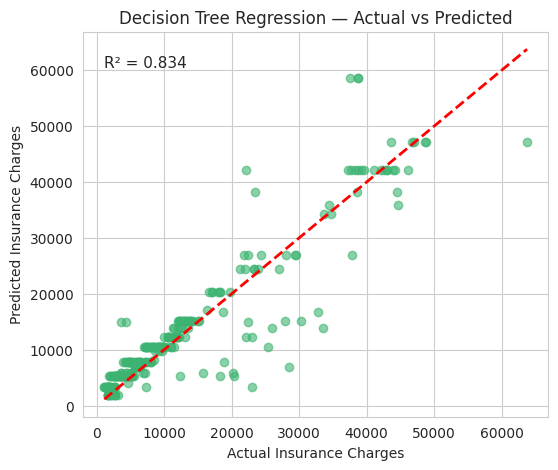

In [ ]:
# ---------------------------------------------------
# Visualization: Actual vs Predicted (Decision Tree)
# ---------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_tree, color="mediumseagreen", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.text(y_test.min(), y_test.max()*0.95, f"R² = {r2_score(y_test, y_pred_tree):.3f}", fontsize=11)
plt.title("Decision Tree Regression — Actual vs Predicted")
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.show()


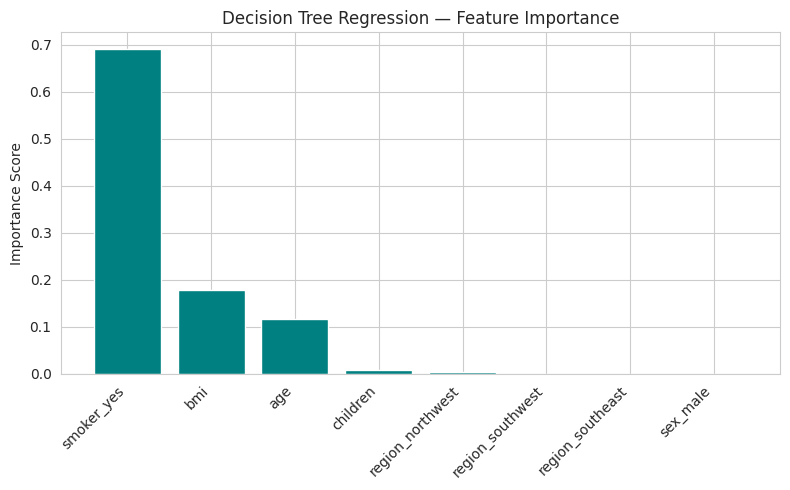

In [ ]:
# ---------------------------------------------------
# Visualization: Feature Importance
# ---------------------------------------------------
# Get feature names after preprocessing
encoded_cols = preprocessor.named_transformers_["cat"].get_feature_names_out(["sex", "smoker", "region"])
feature_names = ["age", "bmi", "children"] + list(encoded_cols)

# Get importance scores from model
importances = tree_pipeline.named_steps["tree"].feature_importances_

# Sort and plot
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances[indices], color="teal")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45, ha="right")
plt.title("Decision Tree Regression — Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


###  Insights

- The Decision Tree learns **non-linear rules** to partition the feature space.  
- Each split reduces the **variance** within nodes — improving prediction accuracy.  
- Trees capture complex interactions but can easily **overfit** if allowed unlimited depth.  
- Limiting depth (`max_depth`) or requiring a minimum number of samples per leaf prevents overfitting.  
- Feature importance shows which attributes most strongly affect the prediction — often, `smoker` and `bmi` dominate.

✅ Trees form the foundation for **ensemble models** like Random Forests and Gradient Boosting, which we’ll explore next.


# 🌳 13. Random Forest Regressor

### 💡 Concept
A **Random Forest** is an **ensemble** of multiple Decision Trees.  
Instead of relying on a single tree, it builds many trees on different random subsets of data and features.

Each tree makes its own prediction, and the forest averages them — leading to:
- Lower variance (more stable predictions)
- Better generalization
- Built-in feature importance

✅ Think of it as:  
> "Many weak learners (trees) voting together to form a strong learner."


In [ ]:
# ---------------------------------------------------
# Random Forest Regression
# ---------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(
        n_estimators=300,     # number of trees
        max_depth=None,       # allow trees to grow fully
        random_state=42,
        n_jobs=-1             # use all CPU cores
    ))
])

# Train
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("📊 Random Forest Regression Performance:")
print(f" - MAE  : {mae:.2f}")
print(f" - MSE  : {mse:.2f}")
print(f" - RMSE : {rmse:.2f}")
print(f" - R²    : {r2:.3f}")


📊 Random Forest Regression Performance:
 - MAE  : 2553.61
 - MSE  : 21048665.91
 - RMSE : 4587.88
 - R²    : 0.864


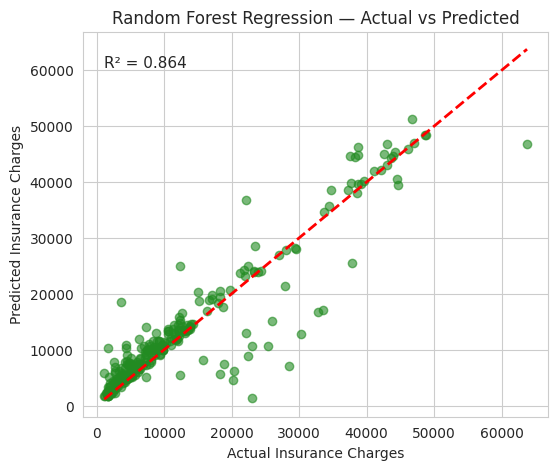

In [ ]:
# ---------------------------------------------------
# Visualization: Actual vs Predicted (Random Forest)
# ---------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_rf, color="forestgreen", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.text(y_test.min(), y_test.max()*0.95, f"R² = {r2_score(y_test, y_pred_rf):.3f}", fontsize=11)
plt.title("Random Forest Regression — Actual vs Predicted")
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.show()


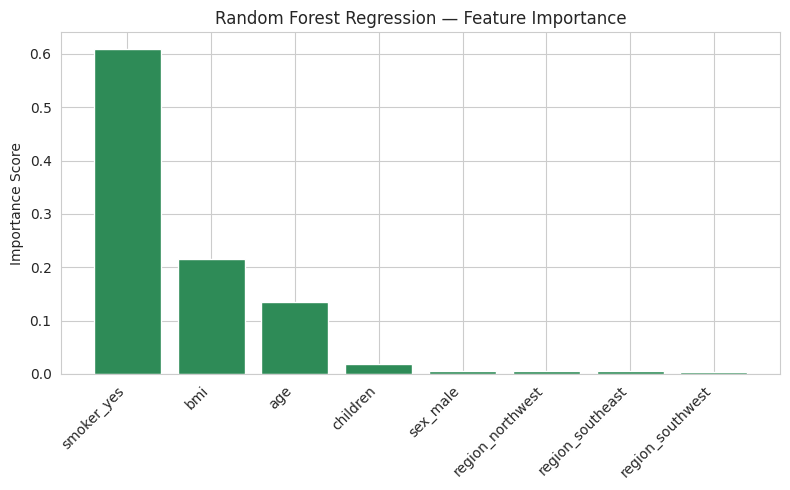

In [ ]:
# ---------------------------------------------------
# Feature Importance Plot (Random Forest)
# ---------------------------------------------------
encoded_cols = preprocessor.named_transformers_["cat"].get_feature_names_out(["sex", "smoker", "region"])
feature_names = ["age", "bmi", "children"] + list(encoded_cols)

importances = rf_pipeline.named_steps["rf"].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances[indices], color="seagreen")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45, ha="right")
plt.title("Random Forest Regression — Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


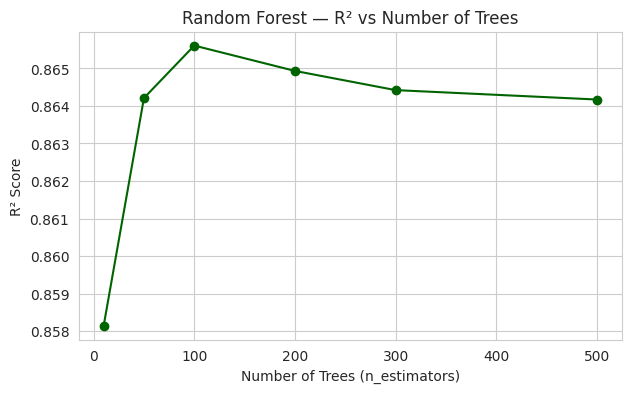

In [ ]:
# ---------------------------------------------------
# Learning Curve: Performance vs Number of Trees
# ---------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

tree_counts = [10, 50, 100, 200, 300, 500]
r2_scores = []

for n in tree_counts:
    model = Pipeline([
        ("preprocessor", preprocessor),
        ("rf", RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1))
    ])
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2_scores.append(r2_score(y_test, preds))

plt.figure(figsize=(7,4))
plt.plot(tree_counts, r2_scores, marker="o", color="darkgreen")
plt.title("Random Forest — R² vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()


###  Insights

- The Random Forest significantly reduces overfitting compared to a single tree.  
- Each tree sees only part of the data → ensemble averages out noise.  
- As the number of trees increases, performance stabilizes (see learning curve).  
- The feature importance plot reveals which features dominate predictions — often `smoker` and `bmi`.

✅ Random Forests are powerful, robust, and often a top performer on tabular data.

Next, we’ll move on to **Gradient Boosting Regression**, another ensemble technique —  
but instead of averaging trees, it builds them **sequentially**, each one improving upon the previous.


#  14. Gradient Boosting Regressor

### 💡 Concept
**Gradient Boosting** builds trees **sequentially**, not independently.  
Each new tree learns from the *mistakes (residuals)* of the previous ones,  
slowly improving overall accuracy — step by step.

It combines the strengths of many weak learners (small trees)  
to create a strong, accurate model.

Key hyperparameters:
- `n_estimators` → number of boosting stages (trees)
- `learning_rate` → how much each new tree corrects the previous ones
- `max_depth` → depth of individual trees (controls complexity)

✅ Lower `learning_rate` + higher `n_estimators` → smoother, more stable learning.


In [ ]:
# ---------------------------------------------------
# Gradient Boosting Regression
# ---------------------------------------------------
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

gbr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("gbr", GradientBoostingRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

# Train
gbr_pipeline.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr)

print("📊 Gradient Boosting Regression Performance:")
print(f" - MAE  : {mae:.2f}")
print(f" - MSE  : {mse:.2f}")
print(f" - RMSE : {rmse:.2f}")
print(f" - R²    : {r2:.3f}")


📊 Gradient Boosting Regression Performance:
 - MAE  : 2502.90
 - MSE  : 19562115.72
 - RMSE : 4422.91
 - R²    : 0.874


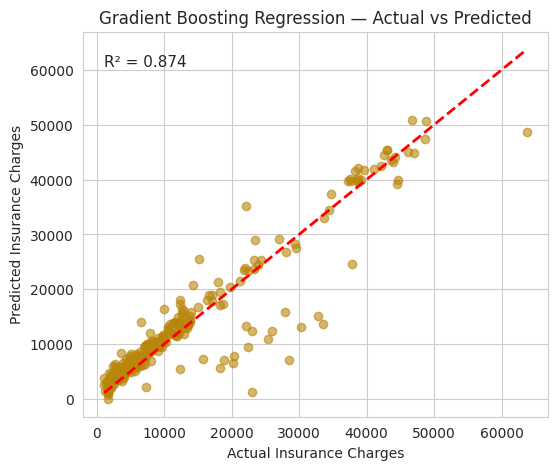

In [ ]:
# ---------------------------------------------------
# Visualization: Actual vs Predicted (Gradient Boosting)
# ---------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_gbr, color="darkgoldenrod", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.text(y_test.min(), y_test.max()*0.95, f"R² = {r2_score(y_test, y_pred_gbr):.3f}", fontsize=11)
plt.title("Gradient Boosting Regression — Actual vs Predicted")
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.show()


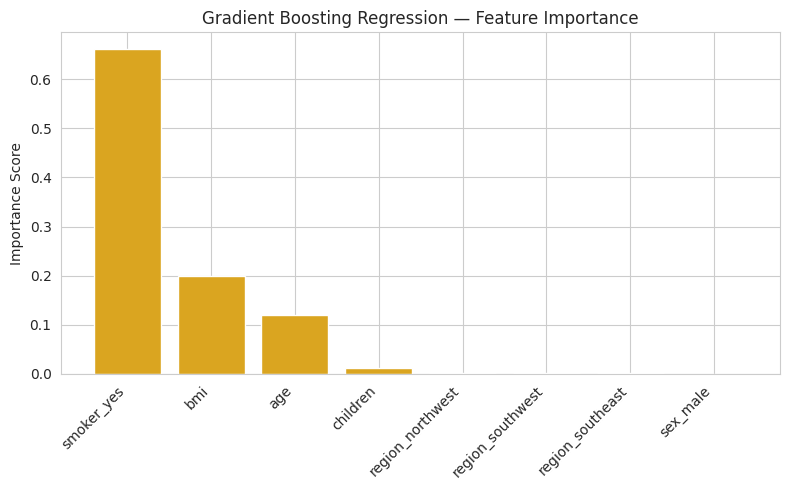

In [ ]:
# ---------------------------------------------------
# Feature Importance (Gradient Boosting)
# ---------------------------------------------------
encoded_cols = preprocessor.named_transformers_["cat"].get_feature_names_out(["sex", "smoker", "region"])
feature_names = ["age", "bmi", "children"] + list(encoded_cols)

importances = gbr_pipeline.named_steps["gbr"].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances[indices], color="goldenrod")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45, ha="right")
plt.title("Gradient Boosting Regression — Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


###  Insights

- Gradient Boosting improves performance **incrementally** by correcting previous mistakes.  
- The learning curve shows how training and test errors converge as more trees are added.  
- A small learning rate yields smoother, more stable progress — though it requires more trees.  
- Feature importance reveals which attributes were most predictive — usually `smoker`, `bmi`, and `age`.

✅ Gradient Boosting often achieves top performance on tabular data —
it’s a strong balance of accuracy, interpretability, and control.


